# TODO
- TODO: Clean validation data

In [164]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import self_driving_car
from self_driving_car import data_generator
from imp import reload
%matplotlib inline

In [165]:
reload(self_driving_car.data_generator)
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
#datagen.shuffle()
datagen.split(valid_size=0.2)
datagen.deactivate_cam('L')
datagen.deactivate_cam('R')
datagen.deactivate_mod('mod_blur')
datagen.deactivate_mod('mod_shadow')
datagen.deactivate_mod('mod_flip')
datagen.deactivate_mod('mod_lighting')

print("Number of samples:           ", datagen.num_of_samples('all'))
print("Numver of training samples:  ", datagen.num_of_samples('train'))
print("Number of validation samples:", datagen.num_of_samples('valid'))
print("soll", (len(datagen.data)/(3*5)))

split data into 30156 training sample and 7539 validation samples
Number of samples:            37695
Numver of training samples:   2011
Number of validation samples: 502
soll 2513.0


In [166]:
datagen.data[datagen.data.is_train == True]

,img,steering,throttle,brake,speed,cam,filter,flip,is_train,is_valid
7540,dataset4_beta_sim/IMG_preprocessed/mod_identit...,-0.038006,1.000000,0.0,30.190319,C,mod_identity,1,True,False
7555,dataset4_beta_sim/IMG_preprocessed/mod_identit...,-0.038006,1.000000,0.0,30.190260,C,mod_identity,1,True,False
7570,dataset4_beta_sim/IMG_preprocessed/mod_identit...,-0.038006,1.000000,0.0,30.190260,C,mod_identity,1,True,False
7585,dataset4_beta_sim/IMG_preprocessed/mod_identit...,-0.038006,1.000000,0.0,30.190250,C,mod_identity,1,True,False
7600,dataset4_beta_sim/IMG_preprocessed/mod_identit...,-0.038006,1.000000,0.0,30.190050,C,mod_identity,1,True,False
7615,dataset4_beta_sim/IMG_preprocessed/mod_identit...,-0.038006,1.000000,0.0,30.190250,C,mod_identity,1,True,False
7630,dataset4_beta_sim/IMG_preprocessed/mod_identit...,-0.038006,1.000000,0.0,30.190269,C,mod_identity,1,True,False
7645,dataset4_beta_sim/IMG_preprocessed/mod_identit...,-0.038006,1.000000,0.0,30.190310,C,mod_identity,1,True,False
7660,dataset4_beta_sim/IMG_preprocessed/mod_identit...,-0.038006,1.000000,0.0,30.190269,C,mod_identity,1,True,False
7675,dataset4_beta_sim/IMG_preprocessed/mod_identit...,-0.038006,1.000000,0.0,30.190290,C,mod_identity,1,True,False


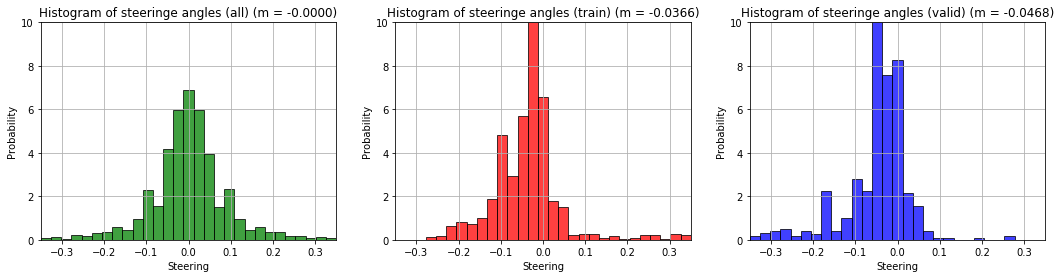

In [167]:
x1 = datagen.data['steering'].values
x2 = datagen.data[datagen.data['is_train'] == True]['steering'].values
x3 = datagen.data[datagen.data['is_valid'] == True]['steering'].values

# the histogram of the data
fig = plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title(r'Histogram of steeringe angles (all) (m = %.4f)' % np.mean(x1)); plt.grid(zorder=0)
n, bins, patches = plt.hist(x1, 29, range=[-0.35, 0.35], normed=1, edgecolor='black', facecolor='green', alpha=0.75)
plt.xlabel('Steering'); plt.ylabel('Probability')
plt.xlim((-0.35,0.35)); plt.ylim((0,10));
plt.subplot(1,3,2)
plt.title(r'Histogram of steeringe angles (train) (m = %.4f)' % np.mean(x2)); plt.grid(True);
n, bins, patches = plt.hist(x2, 29, range=[-0.35, 0.35], normed=1, edgecolor='black', facecolor='red', alpha=0.75)
plt.xlabel('Steering'); plt.ylabel('Probability')
plt.xlim((-0.35,0.35)); plt.ylim((0,10));
plt.subplot(1,3,3)
plt.title(r'Histogram of steeringe angles (valid) (m = %.4f)' % np.mean(x3)); plt.grid(True)
n, bins, patches = plt.hist(x3, 29, range=[-0.35, 0.35], normed=1, edgecolor='black', facecolor='blue', alpha=0.75)
plt.xlabel('Steering'); plt.ylabel('Probability')
plt.xlim((-0.35,0.35)); plt.ylim((0,10)); 
plt.show()

In [177]:
from self_driving_car import model
reload(self_driving_car)
reload(self_driving_car.model)
model = self_driving_car.model.SDRegressionModel("udacity")
model.train_generator(datagen, "20170211_D", nb_epoch = 6)

Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/6
1920/2011 [===========================>..] - ETA: 0s - loss: 5.9994 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//udacity/weights/20170211_D/weights.00-0.3176.hdf5
2112/2011 [===============================] - 9s - loss: 5.4921 - val_loss: 0.3176
Epoch 2/6
2112/2011 [===============================] - 8s - loss: 0.3359 - val_loss: 0.0722
Epoch 3/6
2112/2011 [===============================] - 8s - loss: 0.0385 - val_loss: 0.0096
Epoch 4/6
2112/2011 [===============================] - 8s - loss: 0.0080 - val_loss: 0.0063
Epoch 5/6
2112/2011 [===============================] - 8s - loss: 0.0064 - val_loss: 0.0064
Epoch 6/6
2112/2011 [===============================] - 8s - loss: 0.0065 - val_loss: 0.0065


In [109]:
#datagen.add_dataset("dataset1_udacity")
#datagen.add_dataset("dataset2_twe_one_lap")
#datagen.add_dataset("dataset3_ssz_one_lap")
##datagen.auto_prepare();
#datagen.smooth_steering(window=60); # <<<<<<<< das ist gut -- ne
# DAS WAR GUT:
#datagen.filter_data_not_moving()
#datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.75)
#datagen.correct_camera_steering(0.03)
##datagen.filter_data_low_steering(low_steering_threshold = 0.04, low_steering_remove_prop = 0.4+0.1)
##datagen.filter_data_low_steering(low_steering_threshold = 0.03, low_steering_remove_prop = 0.5+0.1)
#datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.3)
#datagen.filter_data_low_steering(low_steering_threshold = 0.02, low_steering_remove_prop = 0.6+0.1) #raus?
#datagen.correct_camera_steering(0.05)
#datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.30) # NEW?
#datagen.filter_data_low_steering(low_steering_threshold = 0.02, low_steering_remove_prop = 0.85) # <
#datagen.filter_data_low_steering(low_steering_threshold = 0.03, low_steering_remove_prop = 0.85) # NEU (x2)
#datagen.correct_camera_steering(0.08)
#datagen.correct_camera_steering(0.18)

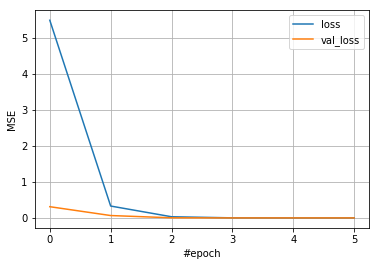

In [178]:
history = model._history
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('#epoch'); plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [179]:
import pydot_ng
from keras.utils.visualize_util import plot
model.model.summary()
plot(model.model, to_file=('doc/images/model_%s.png' % model.modelname))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_8 (Lambda)                (None, 192, 192, 3)   0           lambda_input_8[0][0]             
____________________________________________________________________________________________________
cropping2d_8 (Cropping2D)        (None, 107, 192, 3)   0           lambda_8[0][0]                   
____________________________________________________________________________________________________
convolution2d_15 (Convolution2D) (None, 103, 188, 6)   456         cropping2d_8[0][0]               
____________________________________________________________________________________________________
maxpooling2d_15 (MaxPooling2D)   (None, 51, 94, 6)     0           convolution2d_15[0][0]           
___________________________________________________________________________________________

# Model: Udacity
![model_udacity](./doc/images/model_udacity.png)

(502, 192, 192, 3)
(502, 1)


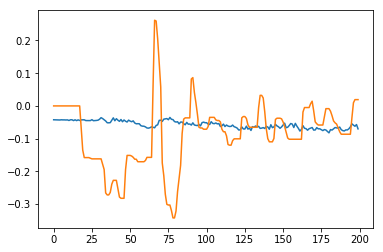

In [180]:
datagen.normalizer = model.normalizer
vdata = datagen.get_valid_data()
print(vdata[0].shape)
s_pred = model.model.predict(vdata[0], batch_size=128)
print(s_pred.shape)

plt.figure()
plt.plot(s_pred[:200]) # blau
plt.plot(vdata[1][:200]) # orange
plt.show()

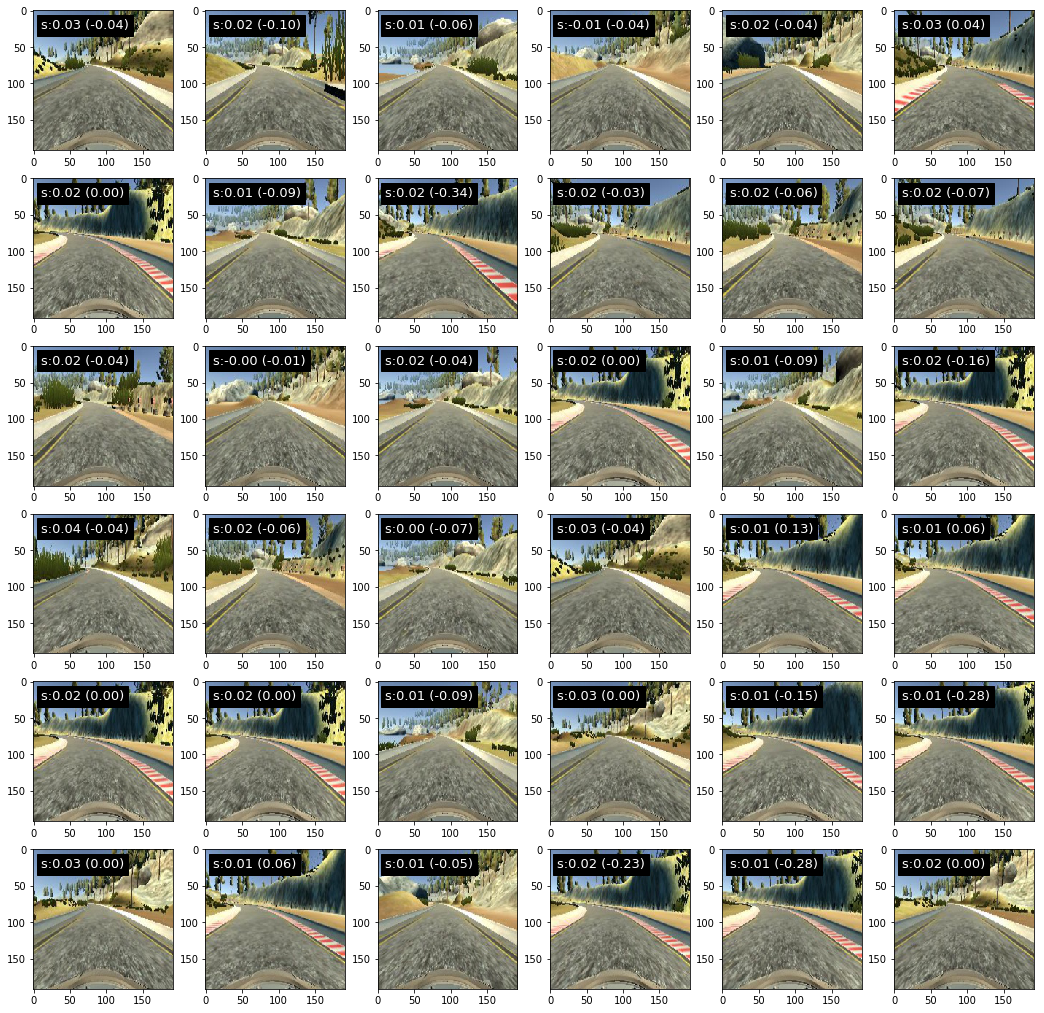

In [169]:
plt.figure(figsize=(18,18))
for i in range(6*6):
    idx = np.random.randint(vdata[0].shape[0]);
    img = vdata[0][idx,:,:,:];
    plt.subplot(6,6,i+1)
    plt.text(10,25,'s:%.2f (%.2f)' % (s_pred[idx], vdata[1][idx]), color='w', fontsize=13, backgroundcolor='k')
    plt.imshow(img)
plt.show()

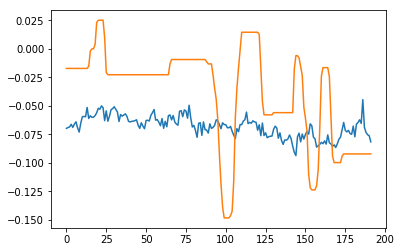

In [185]:
gen = datagen.get_batch_generator()
tdata = next(gen)
s2_pred = model.model.predict(tdata[0], batch_size=192)
plt.figure()
plt.plot(s2_pred[:]) # blau
plt.plot(tdata[1][:]) # orange
plt.show()

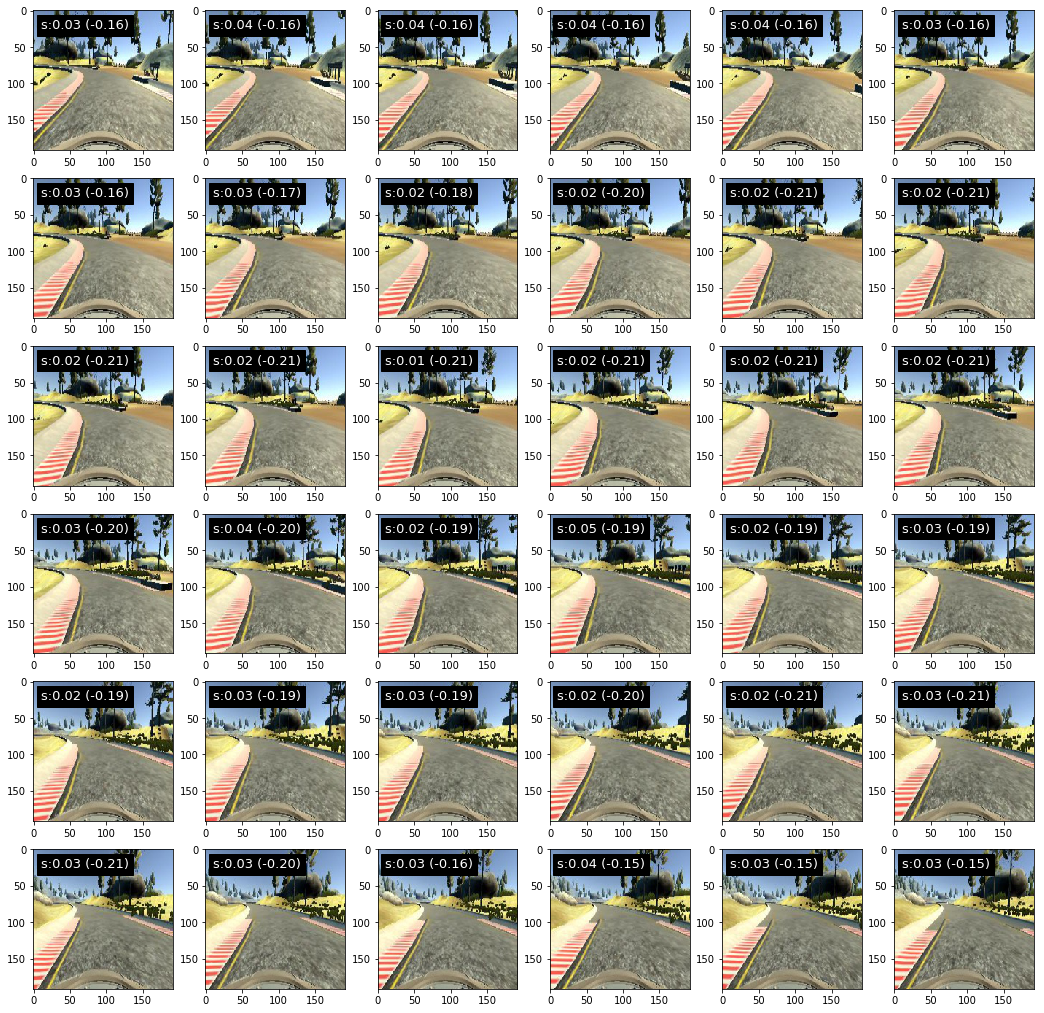

In [174]:
plt.figure(figsize=(18,18))
for i in range(6*6):
    idx = i;
    img = tdata[0][idx,:,:,:];
    plt.subplot(6,6,i+1)
    plt.text(10,25,'s:%.2f (%.2f)' % (s2_pred[idx], tdata[1][idx]), color='w', fontsize=13, backgroundcolor='k')
    plt.imshow(img)
plt.show()